In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate https://drive.google.com/uc?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f -O aerofit.csv

--2025-07-15 03:51:22--  https://drive.google.com/uc?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f
Resolving drive.google.com (drive.google.com)... 142.251.43.46, 2404:6800:4009:805::200e
Connecting to drive.google.com (drive.google.com)|142.251.43.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f [following]
--2025-07-15 03:51:22--  https://drive.usercontent.google.com/download?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.192.97, 2404:6800:4009:82a::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.192.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7461 (7.3K) [application/octet-stream]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.29K  --.-KB/s    in 0.001s  

2025-07-15 03:51:24 (4.96 MB/s) - ‘aerofit.csv’ 

In [4]:
df_aerofit = pd.read_csv('aerofit.csv')

df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df_aerofit["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<Axes: xlabel='Product', ylabel='Income'>

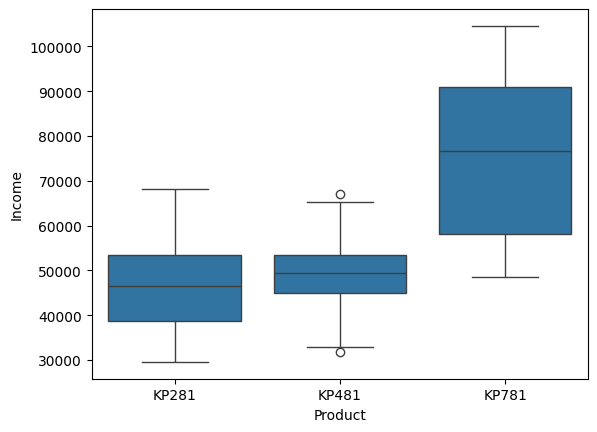

In [6]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)#setup 1  this is huge difference

In [7]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [8]:
np.random.choice(["g1", "g2", "g3"],size=5)

array(['g3', 'g2', 'g2', 'g2', 'g2'], dtype='<U2')

In [9]:
np.random.seed(42)
df_aerofit["random_group"] = np.random.choice(["g1", "g2", "g3"],size=len(df_aerofit))

df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g3
1,KP281,19,Male,15,Single,2,3,31836,75,g1
2,KP281,19,Female,14,Partnered,4,3,30699,66,g3
3,KP281,19,Male,12,Single,3,3,32973,85,g3
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1


<Axes: xlabel='random_group', ylabel='Income'>

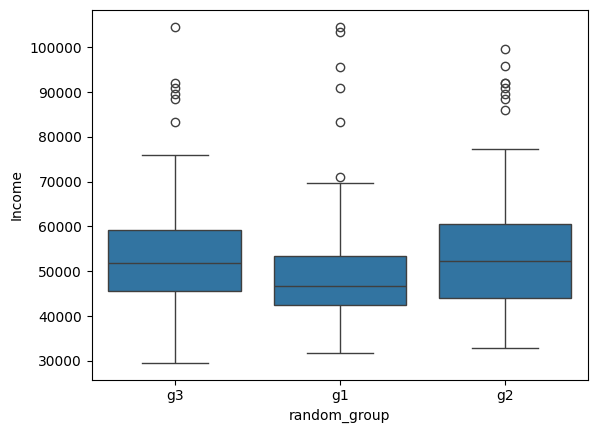

In [10]:
sns.boxplot(x='random_group', y='Income', data=df_aerofit)

In [11]:
from scipy.stats import f_oneway # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical

In [12]:
income_g1 = df_aerofit[df_aerofit["random_group"]=="g1"]["Income"]
income_g2 = df_aerofit[df_aerofit["random_group"]=="g2"]["Income"]
income_g3 = df_aerofit[df_aerofit["random_group"]=="g3"]["Income"]

In [13]:
income_g1.mean(), income_g2.mean(), income_g3.mean()

(51840.44827586207, 55812.69642857143, 53594.954545454544)

In [14]:
# H0: All groups have the same mean
# Ha: One or more groups have different mean
f_stats, p_value = f_oneway(income_g1, income_g2, income_g3)

print("test statistic:",f_stats)
print("p_value:",p_value)

test statistic: 0.8263259710788367
p_value: 0.43933541801191467


In [15]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Fail to reject H0
All groups have same mean


In [16]:
income_kp281 = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [17]:
income_kp281.mean(), income_kp481.mean(), income_kp781.mean()


(46418.025, 48973.65, 75441.575)

In [18]:
# H0: All groups have the same mean
# Ha: One or more groups have different mean
f_stats, p_value = f_oneway(income_kp281, income_kp481, income_kp781)

print("test statistic:",f_stats)
print("p_value:",p_value)

test statistic: 89.25903546601671
p_value: 1.5644991316342494e-27


In [19]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Reject H0
Atleast one group have different mean


In [20]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_kp281, income_kp481)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')
else:
    print("Fail to reject H0")
    print('This means that we do not have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')

p_value: 0.09487529747264932
Fail to reject H0
This means that we do not have enough evidence to conclude that the means of the two income product groups are statistically different from each other.


In [21]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_kp481, income_kp781)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')
else:
    print("Fail to reject H0")
    print('This means that we do not have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')

p_value: 7.770191623361236e-16
Reject H0
This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.


In [22]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_kp281, income_kp781)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')
else:
    print("Fail to reject H0")
    print('This means that we do not have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')

p_value: 4.116508528877672e-21
Reject H0
This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.


In [23]:
from scipy.stats import kruskal

In [24]:
# If assumptions of ANOVA fail, use kruskal
stat, p_value = kruskal(income_g1, income_g2, income_g3)

print("test statistic:",stat)
print("p_value:",p_value)

test statistic: 2.720864198623469
p_value: 0.2565498979655774


In [25]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different median")
else:
    print("Fail to reject H0")
    print("All groups have same median")

Fail to reject H0
All groups have same median


In [26]:
# If assumptions of ANOVA fail, use kruskal
stat, p_value = kruskal(income_kp281, income_kp481, income_kp781)

print("test statistic:",stat)
print("p_value:",p_value)

test statistic: 61.43670384567185
p_value: 4.562357014275808e-14


In [27]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different median")
else:
    print("Fail to reject H0")
    print("All groups have same median")

Reject H0
Atleast one group have different median


In [28]:
!wget --no-check-certificate https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb -O weight-height.csv

--2025-07-15 03:58:20--  https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.google.com (drive.google.com)... 142.251.43.46, 2404:6800:4009:805::200e
Connecting to drive.google.com (drive.google.com)|142.251.43.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb [following]
--2025-07-15 03:58:21--  https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.192.97, 2404:6800:4009:82a::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.192.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  1.47MB/s    in 0.3s    

2025-07-15 03:58:23 (1.47 MB/s) - ‘weigh

In [ ]:
df_hw = pd.read_csv("weight-h")